In [1]:
import pickle
from preprocessing import Preprocessing
from model_selection import ModelSelection
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
def model_evaluate(model, X, Y):
    Y_pred = model.predict(X)
    print(classification_report(Y, Y_pred))
    cf_matrix = confusion_matrix(Y, Y_pred)
    categories = ['Negative', 'Positive']
    group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
    group_percentages = ['{}'.format(value) for value in cf_matrix.flatten()]
    labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names, group_percentages)]
    labels = np.asarray(labels).reshape(2, 2)
    sns.heatmap(cf_matrix, annot=labels, cmap='Blues', fmt='',
                xticklabels=categories, yticklabels=categories)
    plt.xlabel("Predicted values", fontdict={'size': 14}, labelpad=10)
    plt.ylabel("Actual values", fontdict={'size': 14}, labelpad=10)
    plt.title("Confusion Matrix", fontdict={'size': 18}, pad=20)

starting preprocessing...
...preprocessing completed
starting splitting dataset...
...dataset splitted
starting vectorizing words...
...words vectorized
              precision    recall  f1-score   support

           0       0.86      0.83      0.84     39987
           1       0.83      0.86      0.85     40013

    accuracy                           0.84     80000
   macro avg       0.85      0.84      0.84     80000
weighted avg       0.85      0.84      0.84     80000



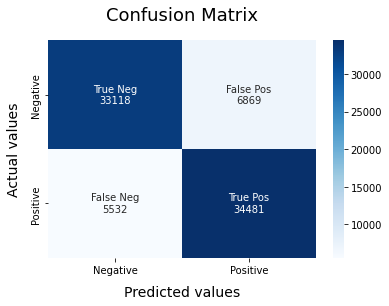

In [10]:
with open('TFIDF_linearSVC_test.pkl', 'rb') as fid:
    model = pickle.load(fid)
prp = Preprocessing()
df = prp.main()
df = Preprocessing.preprocess(df)
X_train, X_test, Y_train, Y_test = ModelSelection.df_train_test_split(df, "text", "sentiment", test_size=0.05)
model_evaluate(model, X_test, Y_test)